# BERT SCORE

BERTSCORE computes the similarity
of two sentences as a sum of cosine similarities between their tokens’ embeddings.

https://arxiv.org/pdf/1904.09675.pdf

Given a reference sentence x = <x1, . . . , xk> and a candidate sentence xˆ = <xˆ1, . . . , xˆl>, we use
contextual embeddings to represent the tokens, and compute matching using cosine similarity, optionally 
weighted with inverse document frequency scores. 

The complete score matches each token in x to a token in xˆ to compute recall,
and each token in xˆ to a token in x to compute precision. We use greedy matching to maximize
the matching similarity score,2 where each token is matched to the most similar token in the other
sentence

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd "/content/drive/My Drive/WORK/ML/YDATA/NLP"

/content/drive/My Drive/WORK/ML/YDATA/NLP


In [5]:
 !pip install bert_score==0.2.2
 !pip install torch
 !pip install git+https://github.com/Tiiiger/bert_score
 !git clone https://github.com/Tiiiger/bert_score
 %cd bert_score
 !pip install .
 %cd ..

  Using cached https://files.pythonhosted.org/packages/47/d5/df44286c8bffc1e38730e889688b03a1a3c2575d673cb7028fd9b185f05b/bert_score-0.2.2-py3-none-any.whl
  Found existing installation: bert-score 0.3.4
    Uninstalling bert-score-0.3.4:
      Successfully uninstalled bert-score-0.3.4
  Cloning https://github.com/Tiiiger/bert_score to /tmp/pip-req-build-mfj4t_u0
  Running command git clone -q https://github.com/Tiiiger/bert_score /tmp/pip-req-build-mfj4t_u0
  Created wheel for bert-score: filename=bert_score-0.3.4-cp36-none-any.whl size=52325 sha256=a5e3a371fff8d15eecb47767bc35d4e8d2963b3097d569da4197f11cc8545f14
  Stored in directory: /tmp/pip-ephem-wheel-cache-le8nff24/wheels/2b/ce/b0/ecd42b306e1a53c32501dcc4861051040115809a2d4638d374
Successfully built bert-score
  Found existing installation: bert-score 0.2.2
    Uninstalling bert-score-0.2.2:
      Successfully uninstalled bert-score-0.2.2
fatal: destination path 'bert_score' already exists and is not an empty directory.
/content

In [ ]:
# !python -m unittest discover

In [6]:
import pandas as pd
import numpy as np
from bert_score import score
import pickle


In [7]:
with open('reaseach_sentiment/combined_data.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [8]:
df['text_2'][0]

'He said the problem needs to be corrected before the space shuttle fleet is cleared to fly again .'

In [10]:
i=0
res = score([df['text_1'][i]], [df['text_2'][i]], lang="en", verbose=True)
res

calculating scores...
computing bert embedding.



computing greedy matching.



done in 0.48 seconds, 2.07 sentences/sec


(tensor([0.9352]), tensor([0.9186]), tensor([0.9268]))

In [13]:
 _, _, F1 = score(list(df['text_1']), list(df['text_2']), lang="en", verbose=True)

calculating scores...
computing bert embedding.



computing greedy matching.



done in 111.67 seconds, 230.75 sentences/sec


In [15]:
F1.shape

torch.Size([25767])

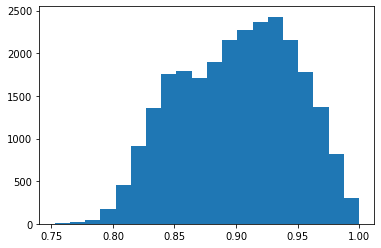

In [19]:
import matplotlib.pyplot as plt
plt.hist(F1, bins=20)
plt.show()

In [16]:
df['bert'] = F1

In [17]:
df.head()

,dataset,label,text_1,text_2,bleu_allwords,bleu_withoutstop,glove_allwords,glove_withoutstop,ftext_allwords,ftext_withoutstop,WMD,1-gram_overlap,2-gram_overlap,3-gram_overlap,4-gram_overlap,ROUGE-1 recall,ROUGE-1 precision,ROUGE-1 F,ROUGE-2 recall,ROUGE-2 precision,ROUGE-2 F,ROUGE-L recall,ROUGE-L precision,ROUGE-L F,chrf_score,chrf_score_norm,POS dist score,text_1_tokens,text_2_tokens,L2_score,bert
0,2012.MSRpar.test.tsv,4.4,The problem likely will mean corrective change...,He said the problem needs to be corrected befo...,0.375739,0.333333,96.20,90.82,77.23,77.39,3,0.400000,0.133333,0.000000,0.000000,0.466667,0.368421,0.411765,0.214286,0.166667,0.187500,0.466667,0.368421,0.411765,0.536815,2.684077,3.055075,"[The, problem, likely, will, mean, corrective,...","[He, said, the, problem, needs, to, be, correc...",10.527886,0.926813
1,2012.MSRpar.test.tsv,0.8,The technology-laced Nasdaq Composite Index .I...,The broad Standard & Poor 's 500 Index .SPX in...,0.461538,0.333333,95.66,88.96,87.95,72.39,3,0.400000,0.117647,0.000000,0.000000,0.500000,0.428571,0.461538,0.176471,0.150000,0.162162,0.500000,0.428571,0.461538,0.391649,1.958247,3.042741,"[The, technology, laced, Nasdaq, Composite, In...","[The, broad, Standard, Poor, s, 500, Index, SP...",11.930013,0.891672
2,2012.MSRpar.test.tsv,3.6,"`` It 's a huge black eye , '' said publisher ...","`` It 's a huge black eye , '' Arthur Sulzberg...",0.578947,0.500000,97.75,94.94,88.39,72.44,2,0.647059,0.294118,0.250000,0.200000,0.640000,0.727273,0.680851,0.333333,0.380952,0.355556,0.560000,0.636364,0.595745,0.549542,2.747710,4.329347,"[It, s, a, huge, black, eye, said, publisher, ...","[It, s, a, huge, black, eye, Arthur, Sulzberge...",9.865285,0.937471
3,2012.MSRpar.test.tsv,3.4,SEC Chairman William Donaldson said there is a...,`` I think there 's a building confidence that...,0.578947,0.444444,98.17,90.51,94.16,75.97,2,0.689655,0.516129,0.413793,0.296296,0.636364,0.823529,0.717949,0.428571,0.562500,0.486486,0.590909,0.764706,0.666667,0.547146,2.735730,0.000000,"[SEC, Chairman, William, Donaldson, said, ther...","[I, think, there, s, a, building, confidence, ...",10.122802,0.923259
4,2012.MSRpar.test.tsv,1.4,Vivendi shares closed 1.9 percent at 15.80 eur...,"In New York , Vivendi shares were 1.4 percent ...",0.384615,0.375000,95.77,87.00,90.74,67.48,3,0.322581,0.066667,0.000000,0.000000,0.294118,0.357143,0.322581,0.062500,0.076923,0.068966,0.294118,0.357143,0.322581,0.293020,1.465099,0.000000,"[Vivendi, shares, closed, 1, 9, percent, at, 1...","[In, New, York, Vivendi, shares, were, 1, 4, p...",14.036093,0.908997


In [20]:
with open('reaseach_sentiment/combined_data.pickle', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)